In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

<IPython.core.display.Javascript object>


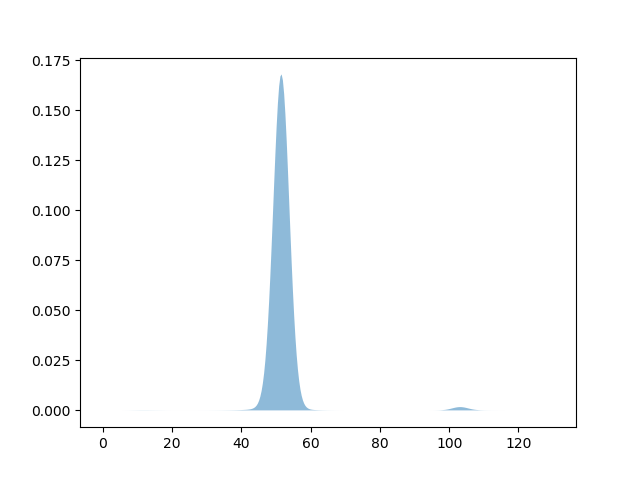

0.08200264146582076
0.12838779354384716


In [11]:
%matplotlib notebook
tList, nList = np.loadtxt("../../Data/v_ext5hz/InAlpha10/alpha02/raster2.00_1.00filtered_E.dat", unpack=True)

dtLofL = []
cvilist = []
dtAll = []

for i in range(4096):
    dtLofL.append([])

t0 = np.zeros(4096)

for t, n in zip(tList, nList):
    n = int(n)

    if t0[n] == 0:
            t0[n] = t
    else:
        dtLofL[n].append(t - t0[n])
        dtAll.append(t - t0[n])
        t0[n] = t
    
    if (t - t0[n]) > 2000:
        print(t, t0[n], n)

for dtList in dtLofL:
    if len(dtList) >= 3:
        cvilist.append(np.std(dtList)/np.mean(dtList))

dtAll = np.array(dtAll)
dt_d = np.linspace(0, int(max(dtAll)), 1000)
kde = KernelDensity(bandwidth=2.0, kernel='gaussian')
kde.fit(dtAll[:, None])

dtDist = np.exp(kde.score_samples(dt_d[:, None]))

plt.fill_between(dt_d, dtDist, alpha=0.5)
plt.plot(dtAll, np.full_like(dtAll, -0.01), '|k', markeredgewidth=1)

print(np.mean(cvilist))
print(np.std(dtAll)/np.mean(dtAll))